In [ ]:
# Do środowiska wykonawczego w notebooku lub na dysk Google przenieś plik z danymi (kc_house_data.csv) o nieruchomościach w King County w USA (ten sam, który był wykorzystywany w prezentacji dot. implementacji modelu regresji liniowej w Pythonie).
from google.colab import drive
drive.mount('drive')
import pandas as pd


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
# Zaimportuj wszystkie niezbędne metody z bibliotek (lub modułów z tych bibliotek).
# Wczytaj plik z danymi do ramki w bibliotece Pandas. Przypisz ramkę danych do zmiennej o nazwie housing_df.
path_to_file = 'drive/MyDrive/CL/Day_1/kc_house_data.csv'
housing_df = pd.read_csv(path_to_file)

In [ ]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
housing_df['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [ ]:
# Wyświetl kilkanaście pierwszych rekordów danych, aby sprawdzić, jak wyglądają dane.
housing_df.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
# Usuń zbędne kolumny ze zbioru danych.
housing_df.drop(['id','date'],axis=1,inplace=True)


In [ ]:
# Korzystając z poznanych metod, zweryfikuj występowanie brakujących wartości w zbiorze danych.
housing_df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


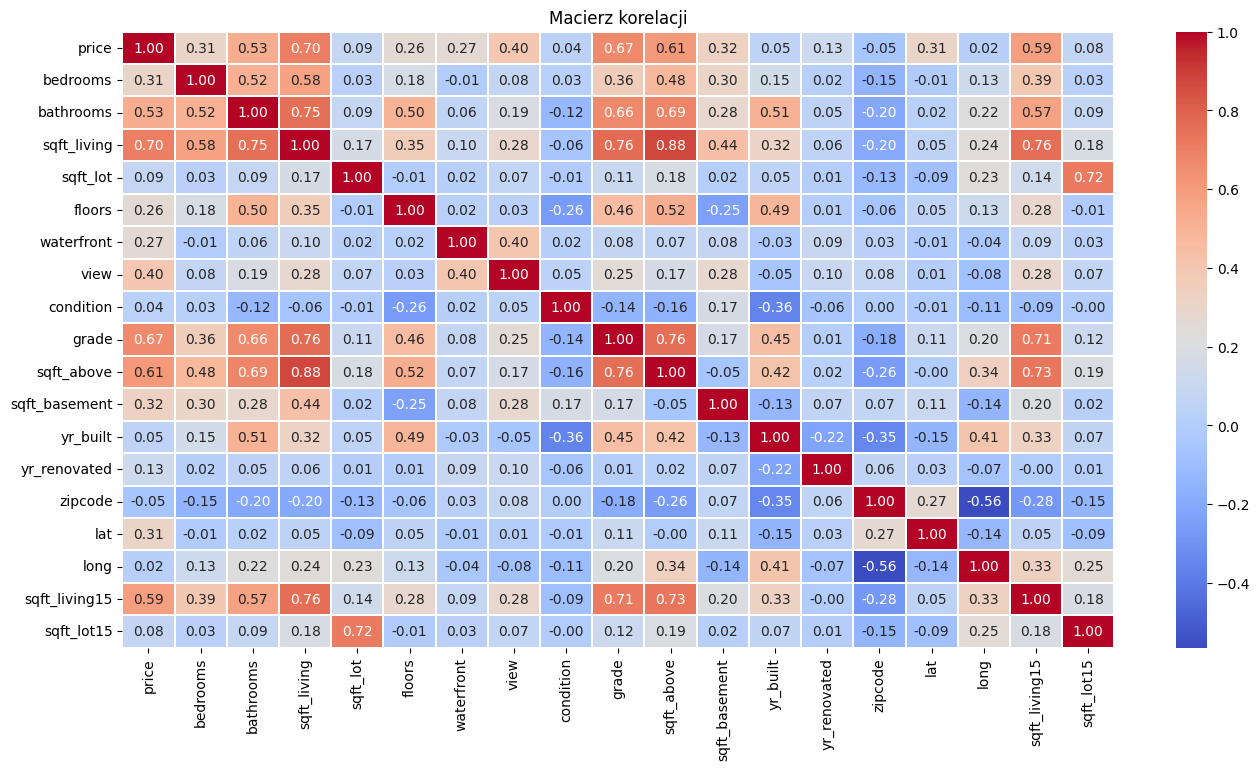

In [ ]:
# Wygeneruj i zwizualizuj macierz korelacji. Liniowość korelacji wybranych zmiennych ze zmienną niezależną (price) możesz zweryfikować metodą graficzną.
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = housing_df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.3,fmt=".2f")
plt.title('Macierz korelacji')
plt.show()
# Korzystając z wybranych wykresów, sprawdź występowanie wartości odstających. W celu dokładnego określenia obserwacji, które mają wartości odstające, skorzystaj z wykresów punktowych wybranych zmiennych i zmiennej zależnej price. Usuń wartości odstające wybraną przez siebie metodą (np. odczytanie z wykresu i filtrowanie, metoda IQR).
# Podziel zbiór danych na treningowy i testowy.
# Zdefiniuj i wytrenuj model z wykorzystaniem danych treningowych. Dokonaj predykcji na danych testowych.
# Wykorzystując metodę .score, sprawdź wynik metryki.
# Wykorzystaj standaryzację/normalizację zmiennych niezależnych i sprawdź, czy wpłynęło to pozytywnie na jakość modelu. Standaryzację wykonaj na zmiennej "X", a następnie wytrenuj model, dokonaj predykcji na zbiorze testowym i wylicz metrykę R2 i porównaj z poprzednio wyliczoną wartością.
# Zapisz przygotowany zbiór danych do pliku .csv. Posłuży Ci do budowy kolejnych modeli w trakcie tego dnia.

In [ ]:
# Korzystając z wybranych wykresów, sprawdź występowanie wartości odstających. W celu dokładnego określenia obserwacji, które mają wartości odstające, skorzystaj z wykresów punktowych wybranych zmiennych i zmiennej zależnej price. Usuń wartości odstające wybraną przez siebie metodą (np. odczytanie z wykresu i filtrowanie, metoda IQR).


In [ ]:
columns = housing_df.columns
columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

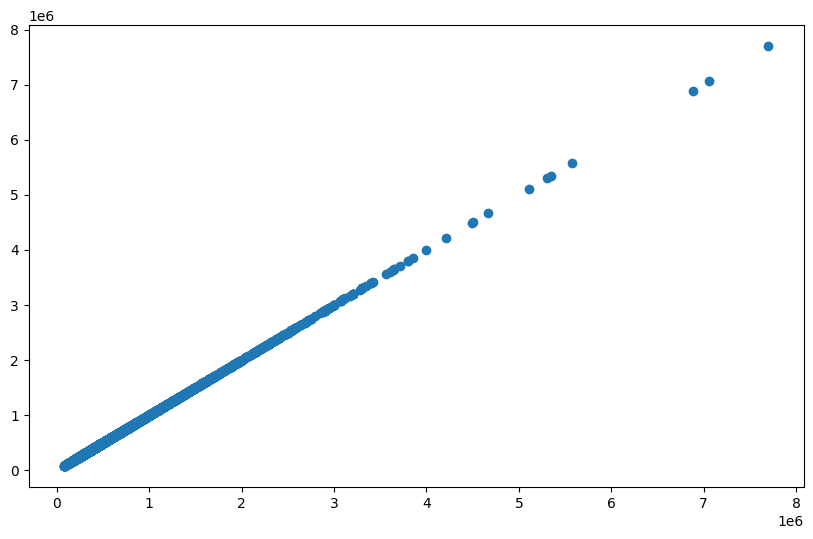

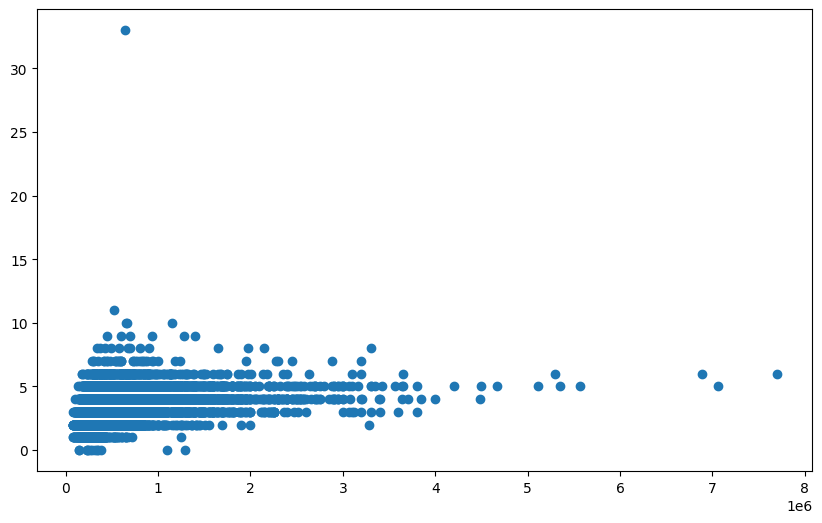

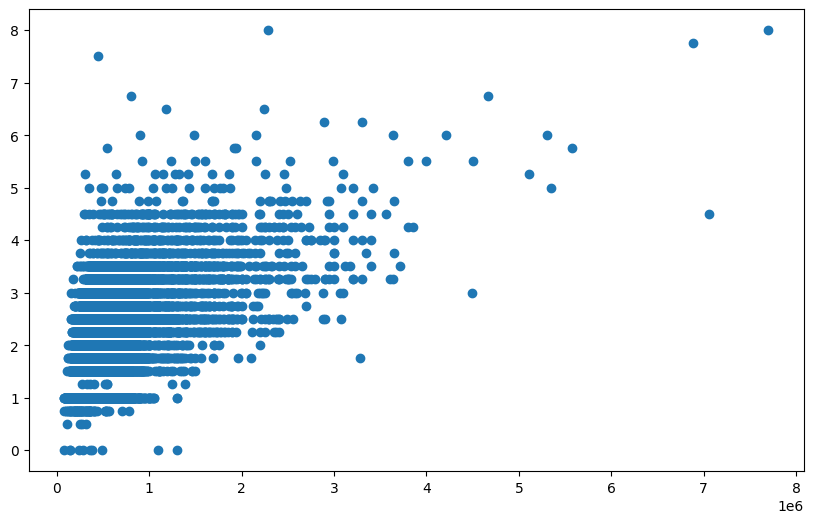

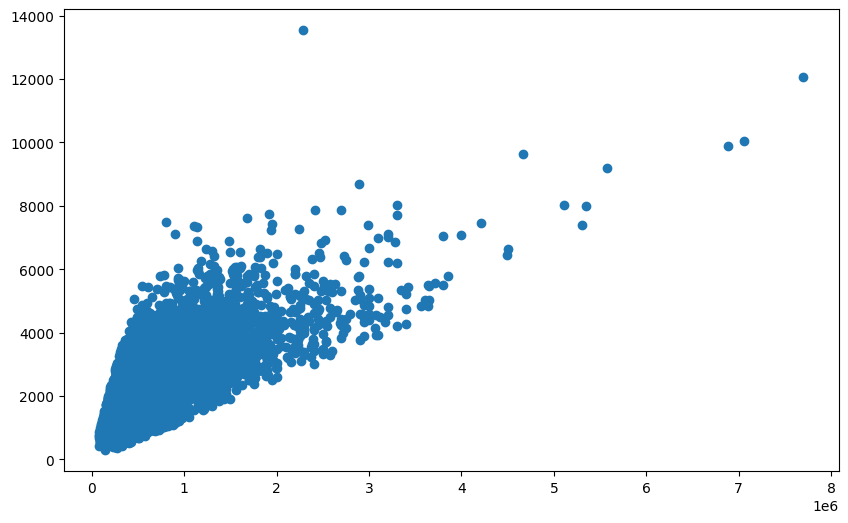

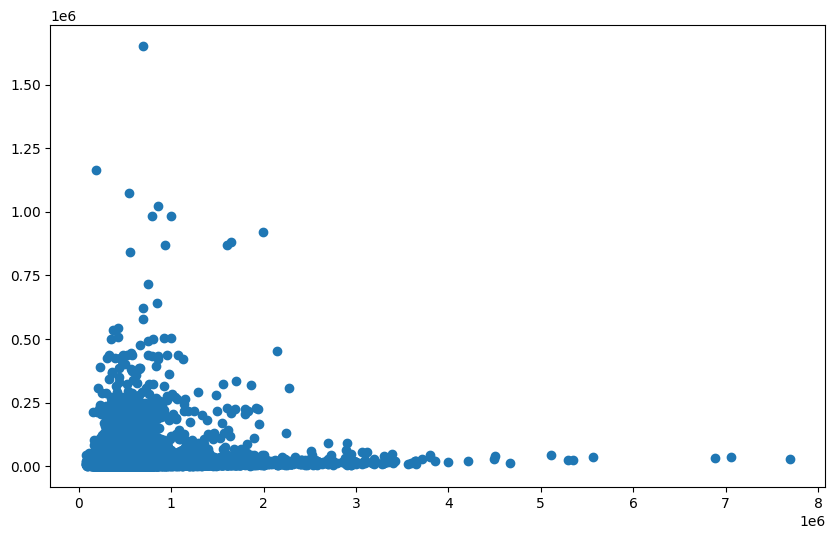

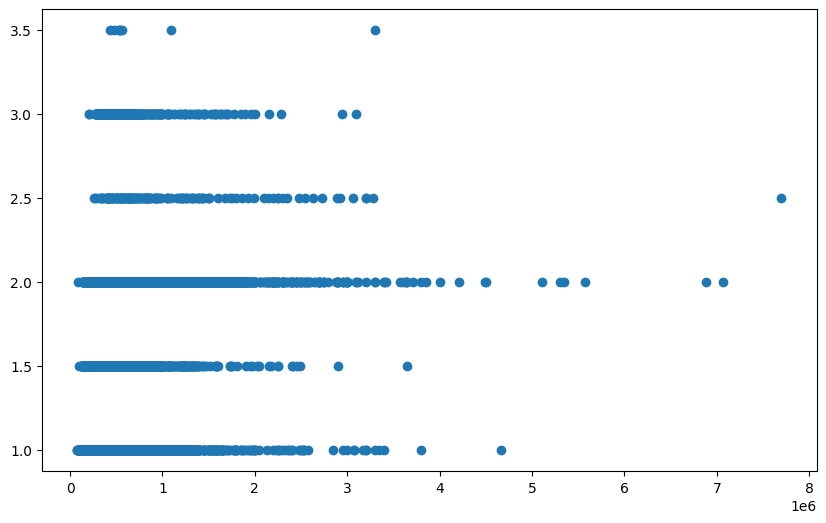

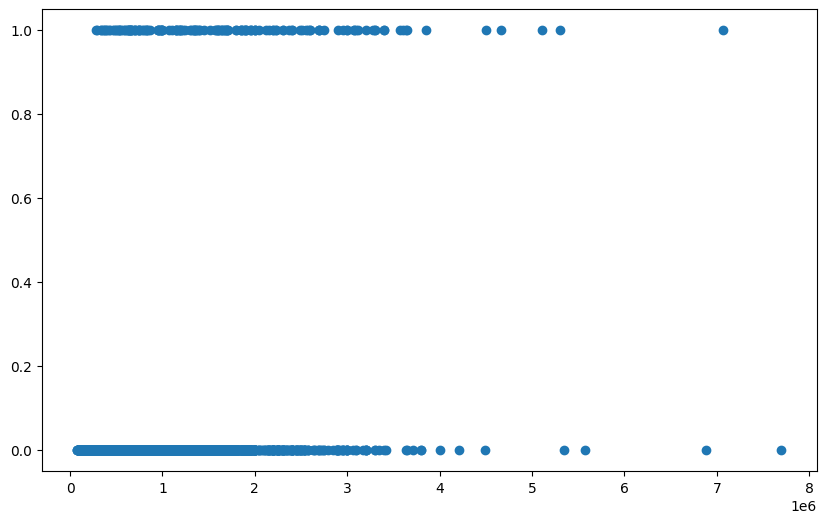

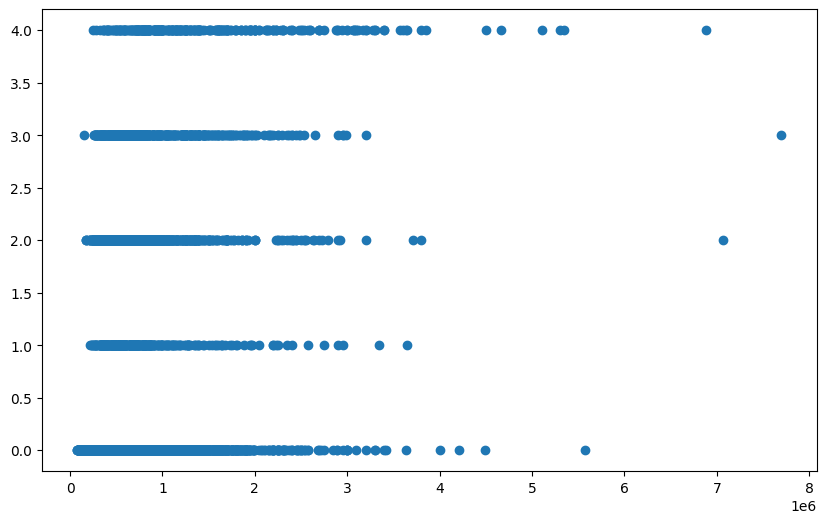

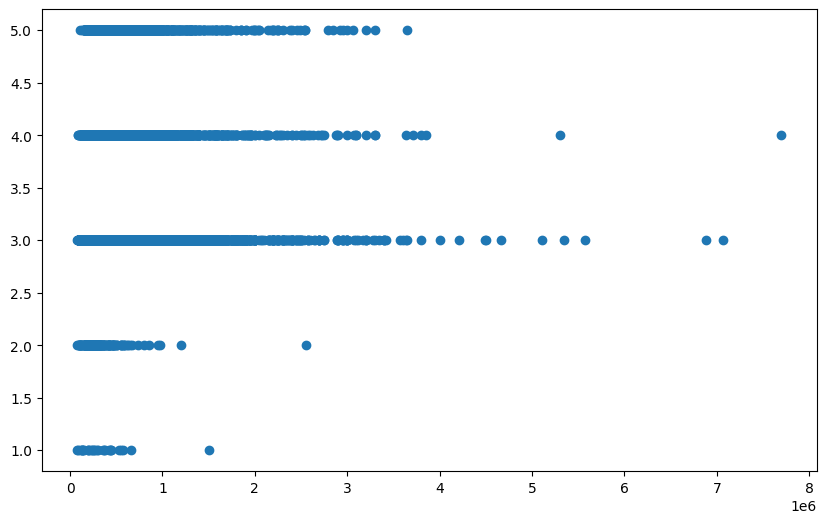

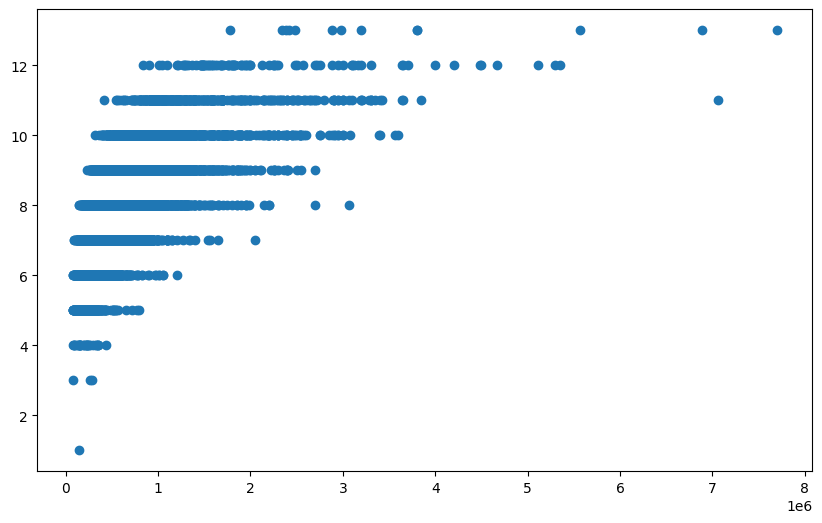

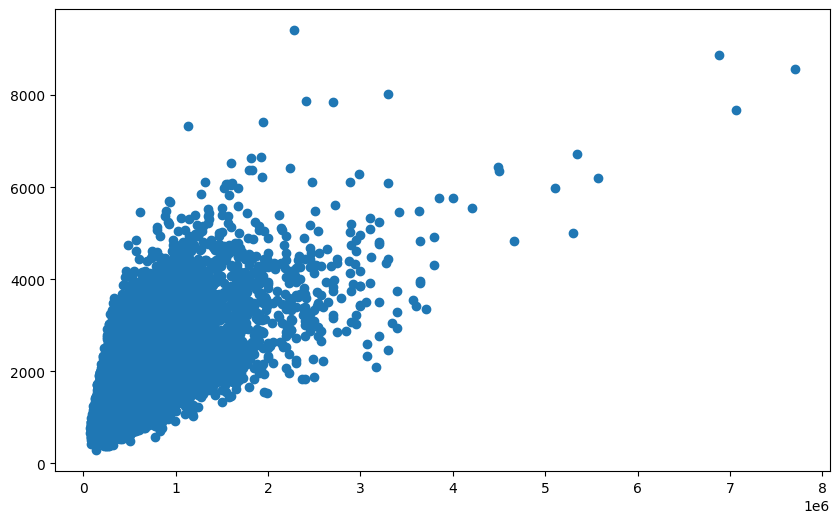

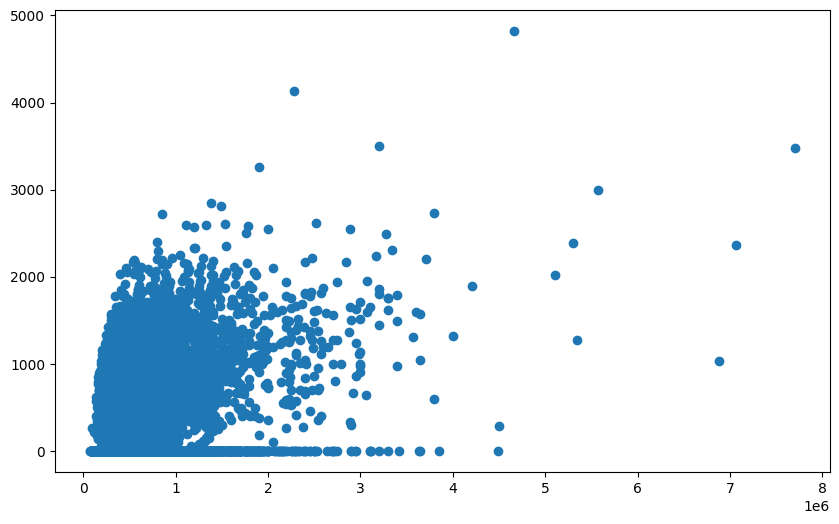

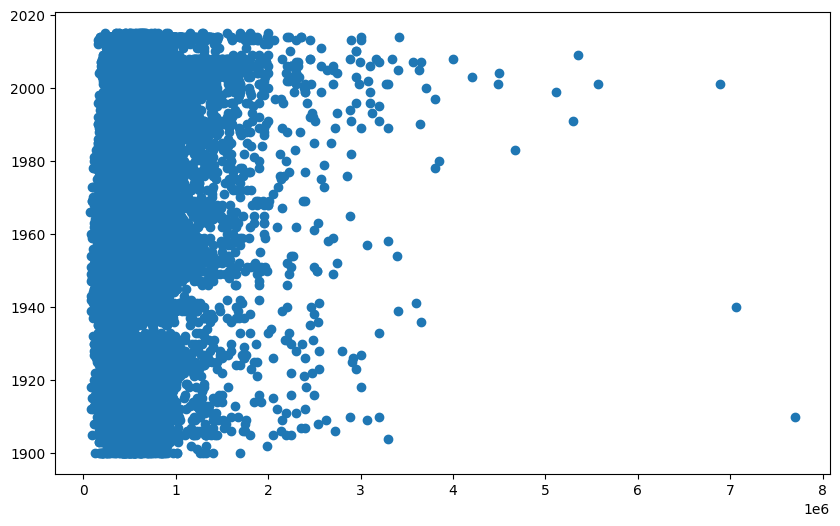

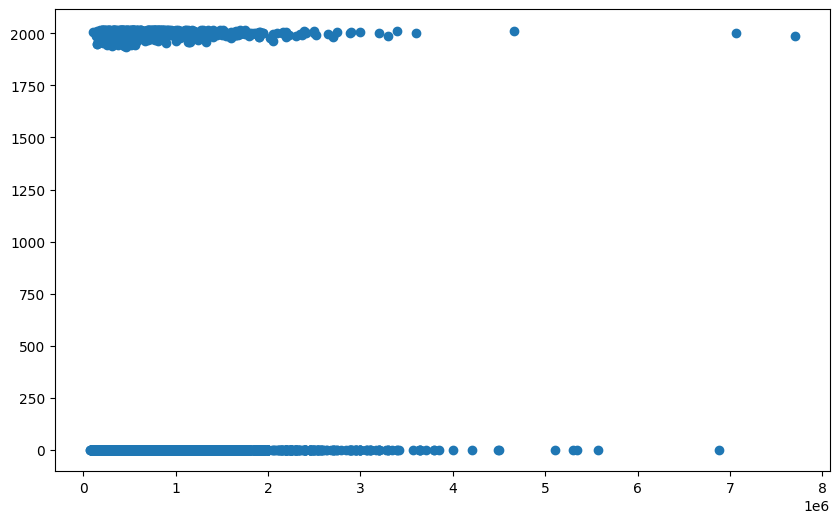

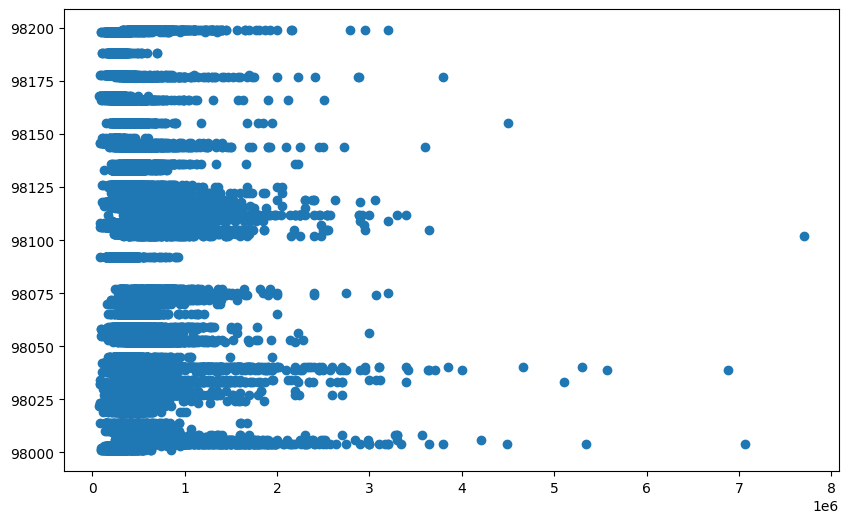

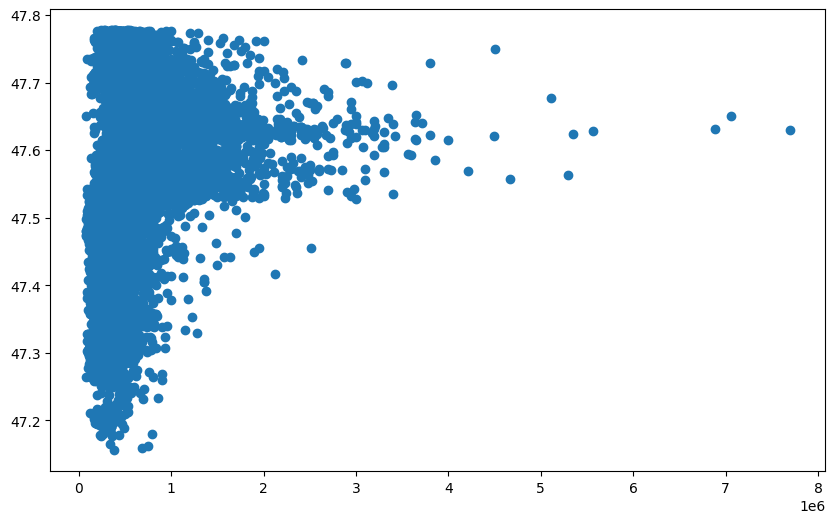

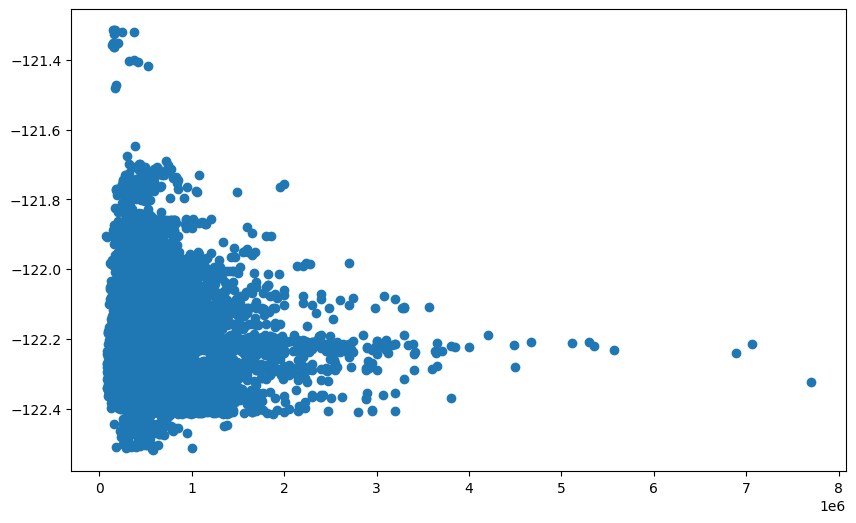

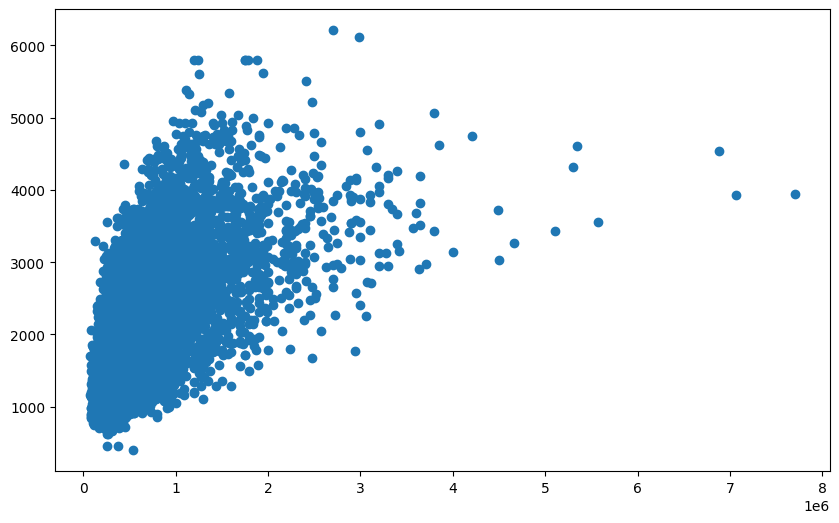

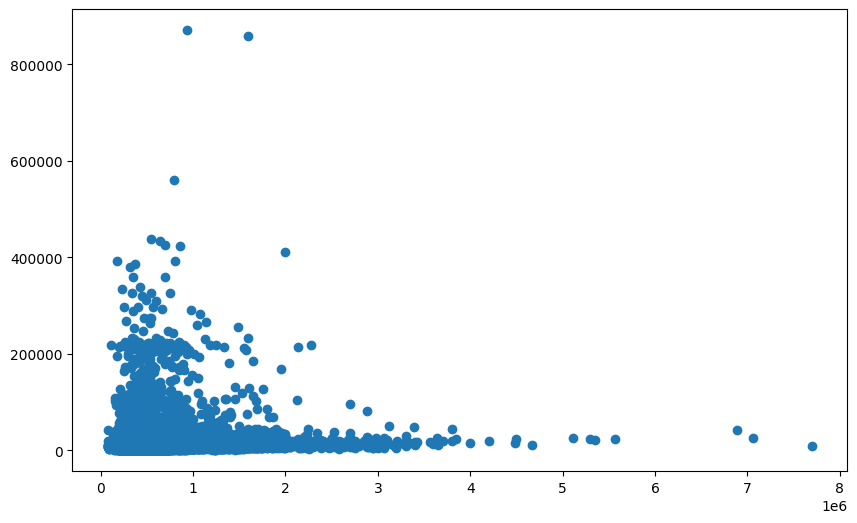

In [ ]:
for column in columns:
  plt.figure(figsize=(10,6))
  plt.scatter(housing_df['price'],housing_df[column])
  plt.show()

In [ ]:
def remove_outliners(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lv = Q1 - 1.5 * IQR
  uv = Q3 + 1.5 * IQR
  return df[(df[column] >= lv) & (df[column] <= uv)]
for column in columns:
  remove_outliners(housing_df,column)


In [ ]:
# Podziel zbiór danych na treningowy i testowy.
from sklearn.model_selection import train_test_split
X = housing_df.drop(['price'],axis=1)
y = housing_df['price']



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
x_train_standarized = scaler.fit_transform(x_train)
x_test_standarized = scaler.transform(x_test)


In [ ]:
# Zdefiniuj i wytrenuj model z wykorzystaniem danych treningowych. Dokonaj predykcji na danych testowych.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train_standarized,y_train)
y_pred = lin_reg.predict(x_test_standarized)
from sklearn.metrics import r2_score
print(f'r2 score {r2_score(x_train,y_train)}')
from sklearn.metrics import mean_squared_error
print(f'mse {mean_squared_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'score {lin_reg.score(y_test,y_pred)}')
# Wykorzystując metodę .score, sprawdź wynik metryki.
# Wykorzystaj standaryzację/normalizację zmiennych niezależnych i sprawdź, czy wpłynęło to pozytywnie na jakość modelu. Standaryzację wykonaj na zmiennej "X", a następnie wytrenuj model, dokonaj predykcji na zbiorze testowym i wylicz metrykę R2 i porównaj z poprzednio wyliczoną wartością.
# Zapisz przygotowany zbiór danych do pliku .csv. Posłuży Ci do budowy kolejnych modeli w trakcie tego dnia.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 365000.  865000. 1038000. ...  410500.  940000.  410000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

NameError: name 'y' is not defined

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
diamonds_df.drop(['Unnamed: 0'], axis=1, Inplace=True)